# Biopython




## Sequence Searching and Retrieval with Biopython

In this hands-on session, we will learn how to perform sequence searching and retrieval using Biopython. We will explore different databases and functions available for this purpose.


In [3]:
from Bio import Entrez
from Bio import SeqIO

### NCBI data retreival

Suppose you want to download some nucleotide sequences from NCBI.

https://www.ncbi.nlm.nih.gov/nucleotide/

The search term `"zea mays subsp mays"[Organism] AND tb1[Gene Name]` gives you about 247 entries (as of 04-11-2024). It would be quite laborious to  search, download, edit the downloaded file, and import them to python for analyses. 


This can be easily done using `Entrez` module of Biopython.


To demonstrate,

Set up your email address for NCBI:

In [12]:
Entrez.email = "your_email@example.com"

In [19]:
handle = Entrez.esearch(db="nucleotide", term='"zea mays subsp mays"[Organism] AND tb1[Gene Name]', retmax=500)
record = Entrez.read(handle)
handle.close()
print("Total records:", record['Count'])

Total records: 247


The `record` object is a dictionary

In [23]:
print("Matching IDs:", record["IdList"])

Matching IDs: ['1810959207', '1810959197', '1810959195', '1810959193', '1810959191', '1810959189', '16305499', '16305498', '16305496', '16305494', '16305492', '16305490', '16305489', '16305487', '16305485', '16305483', '16305481', '16305479', '16305477', '16305475', '16305474', '16305472', '16305470', '16305468', '16305466', '16305464', '16305462', '16305461', '16305459', '16305457', '16305455', '16305454', '16305452', '16305451', '16305449', '16305448', '16305446', '16305444', '16305442', '16305441', '16305439', '16305437', '16305435', '16305433', '16305431', '16305430', '16305428', '16305426', '16305425', '16305423', '16305421', '16305419', '16305418', '16305416', '16305414', '16305413', '16305411', '16305409', '16305407', '16305406', '16305404', '16305403', '16305401', '16305400', '16305398', '16305397', '16305395', '16305394', '16305392', '16305391', '16305389', '16305388', '16305386', '16305385', '16305383', '16305381', '16305380', '16305378', '16305377', '16305375', '16305373', '

In [24]:
print(list(record))

['Count', 'RetMax', 'RetStart', 'IdList', 'TranslationSet', 'TranslationStack', 'QueryTranslation']


In [36]:
record["IdList"][1:6]

['1810959197', '1810959195', '1810959193', '1810959191', '1810959189']

To retreive sequences based on the search, you can create a `for` loop (just one sequence is shown here as example):

In [33]:
for seq_id in record["IdList"][1:2]:
    handle = Entrez.efetch(db="nucleotide", id=seq_id, rettype="fasta", retmode="text")
    seq_record = SeqIO.read(handle, "fasta")
    print(seq_record.id, ":", seq_record.description)
    print(seq_record.seq)
    handle.close()

MN842301.1 : MN842301.1 Zea mays subsp. mays cultivar BML7 teosinte branched 1 (tb1) gene, complete cds
GACATTTTCTACCTACTGAAAGCGGTCTGTTTTTTGTGTTGTCGAGAGTGTGATGGGTAACCATAGTTAATAATGCACTGGATCTATCACTACTCATACAGGTCCCATATGCCTAATAATGTTGTGAAGACCAACTCATCTGACCACATCTGTCCCTACCATGCTTGTACACCACACTACATACATCACTCATCACTGGTCCTTCGTTTCGGTACCCTCCTCCCACAATGTTCAATGTATATACTAATAGTTCTCAAATAAATTCCTGTGGATGTTACAAAAACCCACGGTCTTTGGTTTCCTGAAGAAGTATTTCATGGAGGCGCGCACGTCCATCGTACTGCGTCCTGCAGCTATGGCCGCCCCCATCTGGCCAATAAATGTACTAGGTCACTTGTAGCCAATAGCGTTTCAACATGCACACAGCTTTTCCCCCAATAGTGCAGGTCCTTGTATTCTCCTCCCTCTCCCTCACCTCAAATCTCATCCACACGAACAGGCGGCACGGCAGTATTCCTCCACAGCCCTCCTCTCTATAAGATGGCACAGCCCTCTCAGGTAGGGGCGAGTGTCTCACTCTCACATAGTAAAAAAAAAAAAACGCCCCCAAGGTTCTTAAGCACAATTCTCTAGCTATCTTGGTCTCTTACACAGCCTATGCACATGAGCCCATGCCTCTCCTCTCCTTGCGCCTGCATAGAGAGGTGGTATGATCACCTGGAAAGTTTTTAACTCTCTCTCTCTCTCTCTCTCTCTATTACAGCCTAGACCTTATGCATGGTCGGACGGACACATCTGATCATAGGACATATGAGTAGGCCACACTCCTCCTGCCCCTCTCTCGTAGAGATCAACACACACTGCTCTTAGTGCCAGGACCTAGAGAGGGGAGCGTG

You can always find documentation using `help`

In [37]:
help(Entrez.efetch)

Help on function efetch in module Bio.Entrez:

efetch(db, **keywords)
    Fetch Entrez results which are returned as a handle.

    EFetch retrieves records in the requested format from a list or set of one or
    more UIs or from user's environment.

    See the online documentation for an explanation of the parameters:
    http://www.ncbi.nlm.nih.gov/books/NBK25499/#chapter4.EFetch

    Short example:

    >>> from Bio import Entrez
    >>> Entrez.email = "Your.Name.Here@example.org"
    >>> handle = Entrez.efetch(db="nucleotide", id="AY851612", rettype="gb", retmode="text")
    >>> print(handle.readline().strip())
    LOCUS       AY851612                 892 bp    DNA     linear   PLN 10-APR-2007
    >>> handle.close()

    This will automatically use an HTTP POST rather than HTTP GET if there
    are over 200 identifiers as recommended by the NCBI.

    **Warning:** The NCBI changed the default retmode in Feb 2012, so many
    databases which previously returned text output now giv

In [30]:
record["IdList"][1:5]

['1810959197', '1810959195', '1810959193', '1810959191']

### Searching UniProt Database


Likewise, UniProt, a protein sequence and functional information database, is compatible with biopython to  retreive sequences. The same gene `TB1_MAIZE` is found here

https://www.uniprot.org/uniprotkb/Q93WI2/entry

and using the id `Q93WI2` you can download the sequence as follows:

Load the modules

In [40]:
from Bio import ExPASy
from Bio import SwissProt

In [41]:
handle = ExPASy.get_sprot_raw("Q93WI2")
record = SwissProt.read(handle)
print("Protein Name:", record.description)
print("Organism:", record.organism)
print("Sequence Length:", len(record.sequence))
print("Sequence:", record.sequence)
handle.close()

Protein Name: RecName: Full=Transcription factor TEOSINTE BRANCHED 1;
Organism: Zea mays (Maize).
Sequence Length: 376
Sequence: MFPFCDSSSPMDLPLYQQLQLSPSSPKTDQSSSFYCYPCSPPFAAADASFPLSYQIGSAAAADATPPQAVINSPDLPVQALMDHAPAPATELGACASGAEGSGASLDRAAAAARKDRHSKICTAGGMRDRRMRLSLDVARKFFALQDMLGFDKASKTVQWLLNTSKSAIQEIMADDASSECVEDGSSSLSVDGKHNPAEQLGGGGDQKPKGNCRGEGKKPAKASKAAATPKPPRKSANNAHQVPDKETRAKARERARERTKEKHRMRWVKLASAIDVEAAAASGPSDRPSSNNLSHHSSLSMNMPCAAAELEERERCSSALSNRSAGRMQEITGASDVVLGFGNGGGGYGDGGGNYYCQEQWELGGVVFQQNSRFY


### Searching PDB Database

In [60]:
from Bio.PDB import PDBList

# Initialize PDBList object
pdb_list = PDBList()

# Download PDB file with ID '1A8O'
pdb_list.retrieve_pdb_file('1A8O', file_format='pdb')

'/work/LAS/mhufford-lab/arnstrm/EEOB546/a8/pdb1a8o.ent'

## Parse BLAST results

For this example, protein BLAST (blastp) of _Zea mays_ subspp. _mays_ (B73) proteins was run against SwissProt proteins. Unlike the previous run you ran in Dr. Hufford's class, the results are in XML format. Following commands were used:

```bash
# create blastDB
makeblastdb \
   -in uniprot-sprot_viridiplantae.fasta \
   -dbtype prot
# run BLASTp
blastp \
   -max_target_seqs 5 \
   -outfmt 5 \
   -num_threads $SLURM_CPUS_ON_NODE \
   -query BCB546_Spring2024/course-files/blast_dataset/zm_pep.fa \
   -db uniprot-sprot_viridiplantae.fasta \
   -evalue 0.000001 > blast_output.xml
```

In [82]:
blastoutput = '/work/LAS/mhufford-lab/arnstrm/EEOB546/BCB546_Spring2024/course-files/blast_dataset/blast_output.xml'

In [96]:
from Bio.Blast import NCBIXML
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
result_handle = open(blastoutput)
blast_records = NCBIXML.parse(result_handle)
for blast_record in blast_records:
    for alignment in blast_record.alignments:
        print("Sequence ID:", alignment.title)
        for hsp in alignment.hsps:
            print("Alignment Length:", hsp.align_length)
            print("E-value:", hsp.expect)
            print("Bit Score:", hsp.score)
            print("Identity:", hsp.identities)

Sequence ID: sp|P20027|MYB3_HORVU Myb-related protein Hv33 OS=Hordeum vulgare OX=4513 GN=MYB2 PE=2 SV=3
Alignment Length: 108
E-value: 7.41799e-49
Bit Score: 414.0
Identity: 73
Sequence ID: sp|Q8LPH6|MYB86_ARATH Transcription factor MYB86 OS=Arabidopsis thaliana OX=3702 GN=MYB86 PE=2 SV=1
Alignment Length: 118
E-value: 5.35337e-47
Bit Score: 405.0
Identity: 73
Sequence ID: sp|Q8VZQ2|MYB61_ARATH Transcription factor MYB61 OS=Arabidopsis thaliana OX=3702 GN=MYB61 PE=2 SV=1
Alignment Length: 118
E-value: 1.02684e-46
Bit Score: 404.0
Identity: 75
Sequence ID: sp|Q9LXV2|MYB46_ARATH Transcription factor MYB46 OS=Arabidopsis thaliana OX=3702 GN=MYB46 PE=2 SV=1
Alignment Length: 109
E-value: 8.1701e-45
Bit Score: 385.0
Identity: 69
Sequence ID: sp|Q7XBH4|MYB4_ORYSJ Transcription factor MYB4 OS=Oryza sativa subsp. japonica OX=39947 GN=MYB4 PE=2 SV=2
Alignment Length: 109
E-value: 3.30416e-41
Bit Score: 359.0
Identity: 63
Sequence ID: sp|Q9SEI0|WER_ARATH Transcription factor WER OS=Arabidopsis t

In [75]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 10,5
plt.rcParams.update({'font.size': 8})

In [91]:
result_handle = open(blastoutput)
blast_records = NCBIXML.parse(result_handle)

# Initialize an empty dictionary to store hit counts for each query
query_hit_counts = {}
for blast_record in blast_records:
    # Get the query ID
    query_id = blast_record.query
    # Check if there are any hits for the query
    if blast_record.alignments:
        # Count the number of hits for the query
        hit_count = len(blast_record.alignments)
        # Update hit count for the query
        query_hit_counts[query_id] = hit_count

# Convert the dictionary into lists for plotting
queries = list(query_hit_counts.keys())
hit_counts = list(query_hit_counts.values())

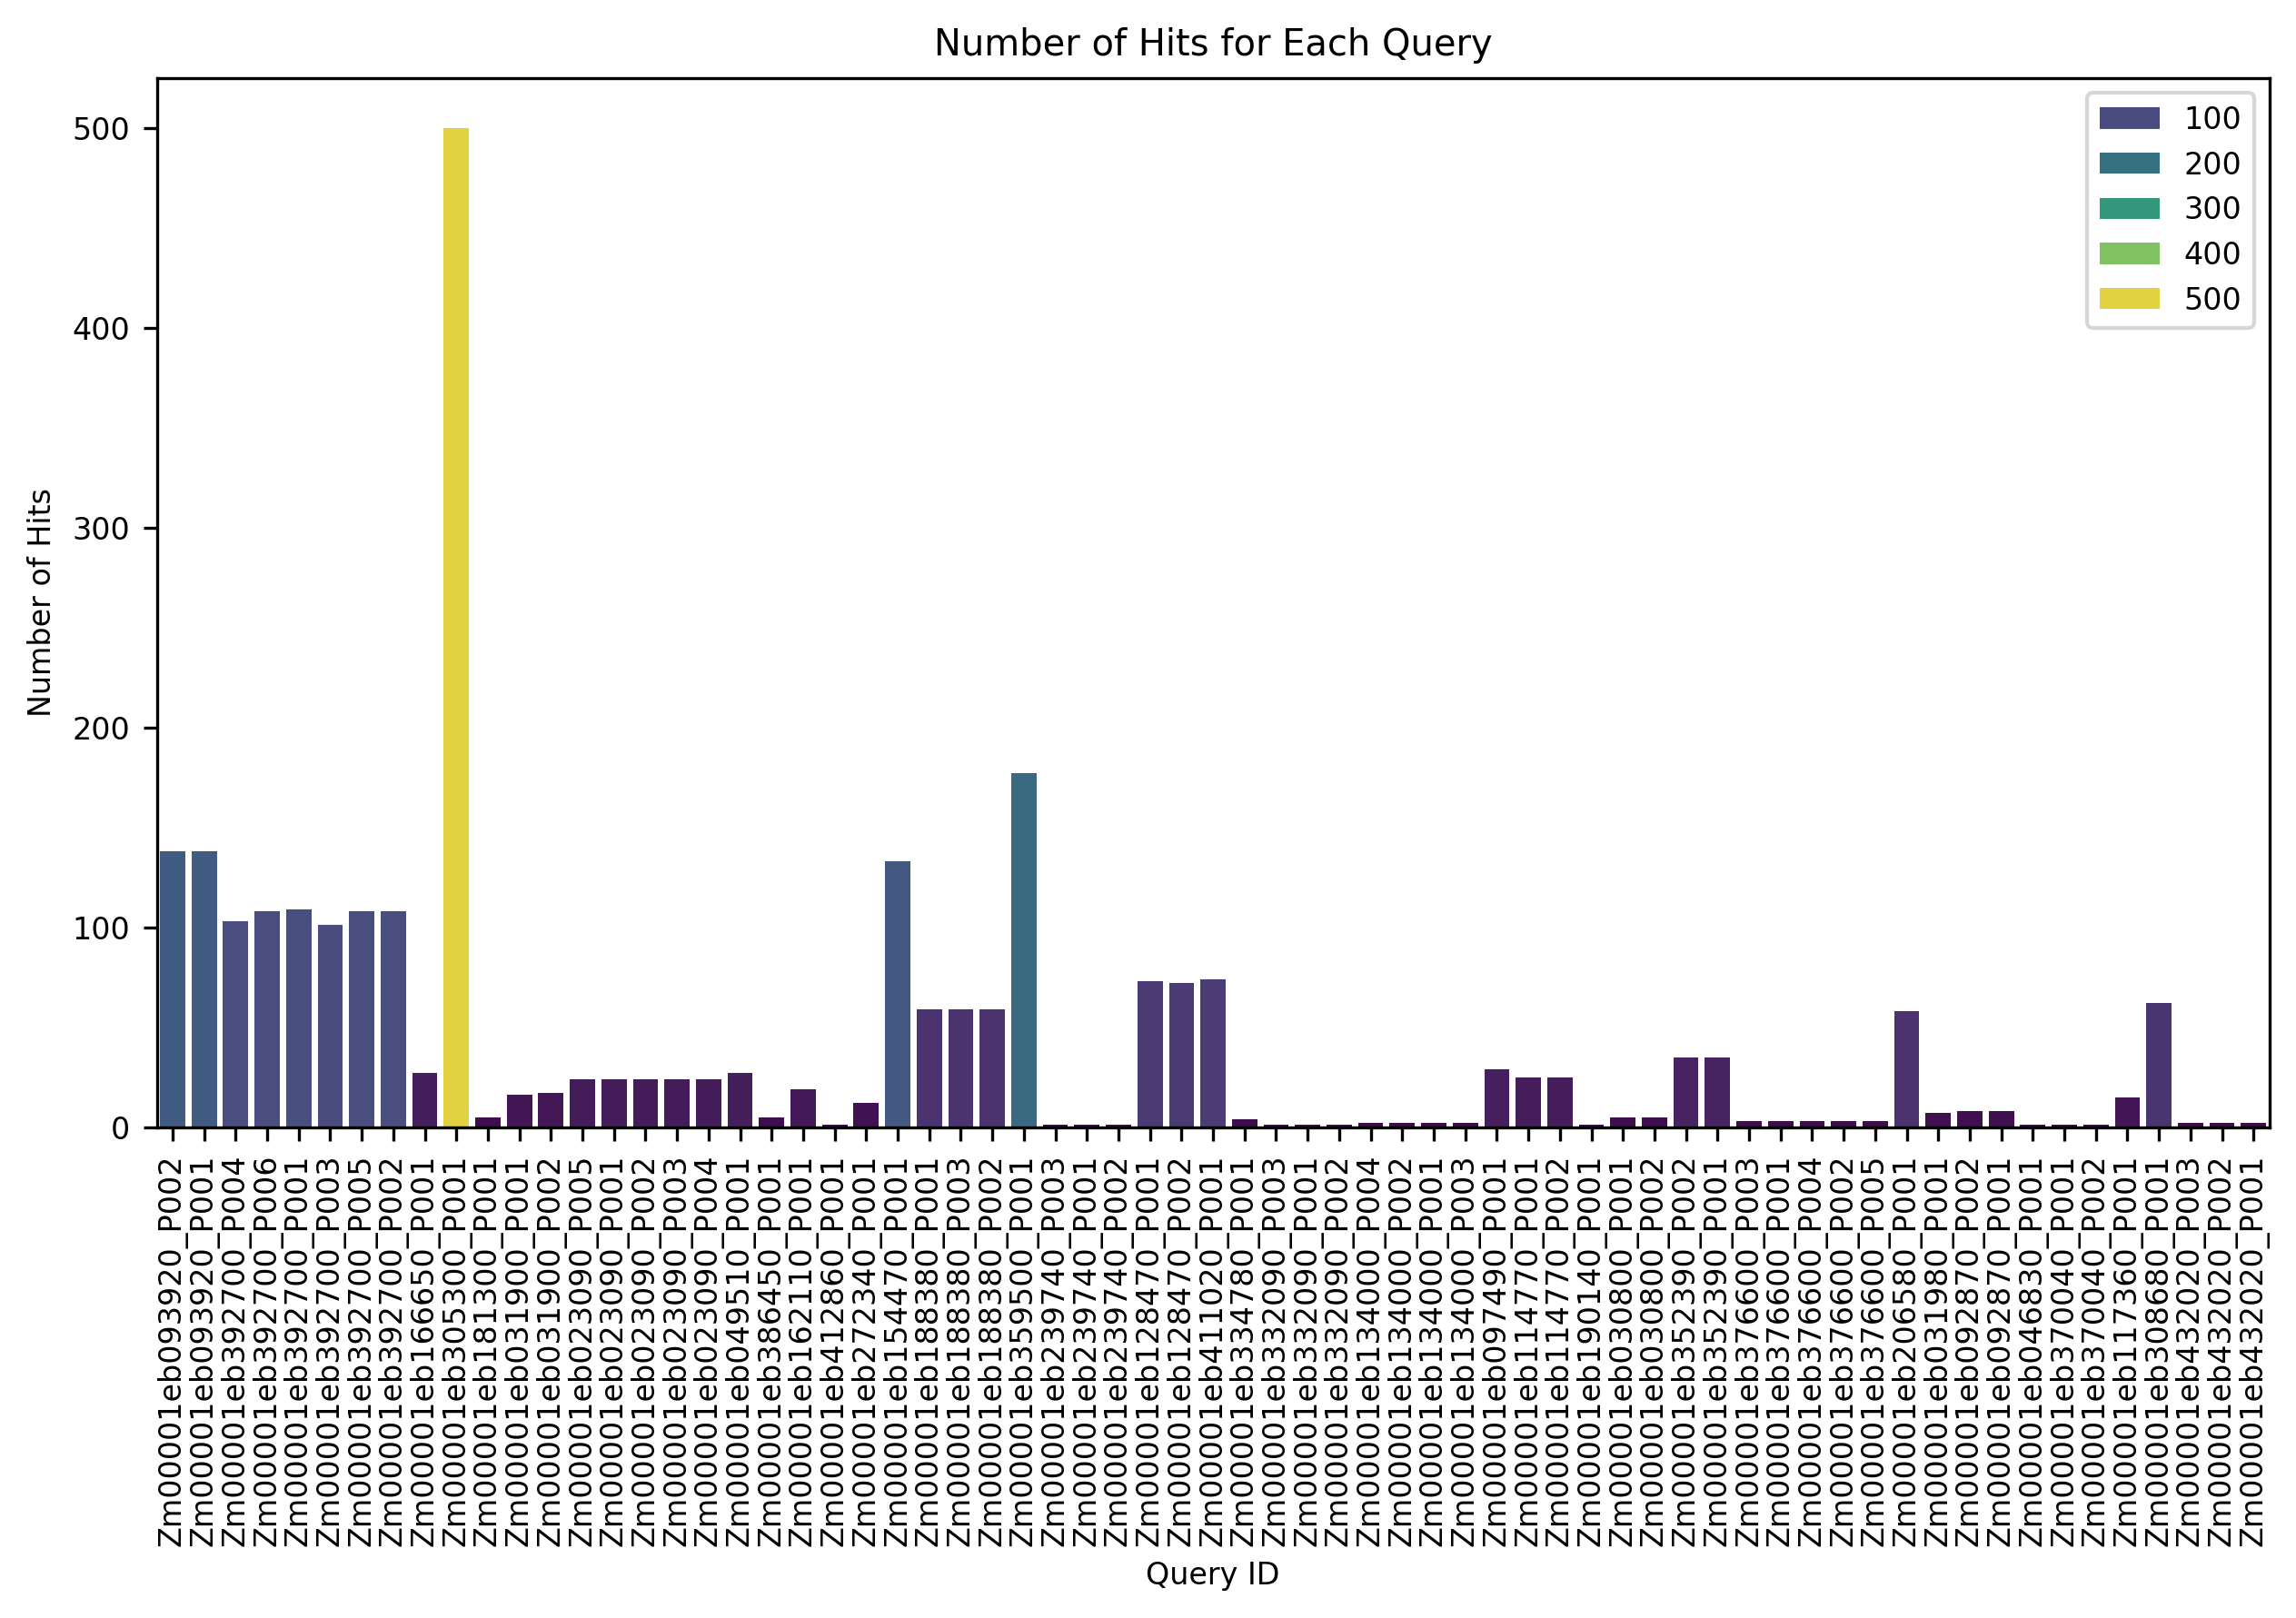

In [94]:
sns.barplot(x=queries, y=hit_counts, hue = hit_counts , palette="viridis")
plt.xlabel("Query ID")
plt.ylabel("Number of Hits")
plt.title("Number of Hits for Each Query")
plt.xticks(rotation=90)
plt.show()

In [99]:
result_handle = open(blastoutput)
blast_records = NCBIXML.parse(result_handle)
alignments = []
for blast_record in blast_records:
    # Iterate over each alignment in the record
    for alignment in blast_record.alignments:
        # Iterate over each high-scoring segment pair (HSP) in the alignment
        for hsp in alignment.hsps:
            # Create a dictionary to store alignment details
            alignment_data = {
                "Query ID": blast_record.query,
                "Subject ID": alignment.hit_id,
                "Alignment Length": hsp.align_length,
                "E-value": hsp.expect,
                "Bit Score": hsp.score,
                "Query Alignment": hsp.query,
                "Subject Alignment": hsp.sbjct
            }
            # Append alignment data to the list
            alignments.append(alignment_data)

# Convert the list of dictionaries into a pandas DataFrame
alignment_df = pd.DataFrame(alignments)

# Display the DataFrame
print(alignment_df.head())

# Visualize sequence alignments using Bio.AlignIO
for alignment_data in alignments:
    print("Query ID:", alignment_data["Query ID"])
    print("Subject ID:", alignment_data["Subject ID"])
    print("Alignment Length:", alignment_data["Alignment Length"])
    print("E-value:", alignment_data["E-value"])
    print("Bit Score:", alignment_data["Bit Score"])
    print("Query Alignment:", alignment_data["Query Alignment"])
    print("Subject Alignment:", alignment_data["Subject Alignment"])
    print()

               Query ID             Subject ID  Alignment Length  \
0  Zm00001eb093920_P002   sp|P20027|MYB3_HORVU               108   
1  Zm00001eb093920_P002  sp|Q8LPH6|MYB86_ARATH               118   
2  Zm00001eb093920_P002  sp|Q8VZQ2|MYB61_ARATH               118   
3  Zm00001eb093920_P002  sp|Q9LXV2|MYB46_ARATH               109   
4  Zm00001eb093920_P002   sp|Q7XBH4|MYB4_ORYSJ               109   

        E-value  Bit Score                                    Query Alignment  \
0  7.417990e-49      414.0  VRKGLWSPVEDARLSSHITRYGVGTWSSVAELAGLERSGKSCRLRW...   
1  5.353370e-47      405.0  GEH--CTHKTVRKGLWSPVEDARLSSHITRYGVGTWSSVAELAGLE...   
2  1.026840e-46      404.0  GEH--CTHKTVRKGLWSPVEDARLSSHITRYGVGTWSSVAELAGLE...   
3  8.170100e-45      385.0  KTVRKGLWSPVEDARLSSHITRYGVGTWSSVAELAGLERSGKSCRL...   
4  3.304160e-41      359.0  CTHKTVRKGLWSPVEDARLSSHITRYGVGTWSSVAELAGLERSGKS...   

                                   Subject Alignment  
0  VRKGLWSPEEDEKLYNHIIRHGVGCWSSVPRLAALNRCGKSCRLRW

## Sequence Manipulation

In [101]:
from Bio.Seq import Seq

In [102]:
dna_sequence = "ATCGATCGATCG"
seq = Seq(dna_sequence)

In [103]:
seq.reverse_complement()

Seq('CGATCGATCGAT')

In [104]:
seq.transcribe()

Seq('AUCGAUCGAUCG')

In [105]:
seq.translate()

Seq('IDRS')

In [106]:
seq.count("AT")

3

In [107]:
seq.find("CG")

2

In [108]:
seq.startswith("ATC")

True

In [110]:
seq.endswith("TCG")

True

In [111]:
seq.index("CG")

2

In [113]:
sequence = Seq("ATCG|ATCG")
substrings = sequence.split("|")
substrings

[Seq('ATCG'), Seq('ATCG')]